In [ ]:
!nvidia-smi

Wed Jul  2 18:10:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics #ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
!git clone https://github.com/ultralytics/ultralytics.git /content/drive/MyDrive/yolo_tutorial

Cloning into '/content/drive/MyDrive/yolo_tutorial'...
remote: Enumerating objects: 61743, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 61743 (delta 78), reused 42 (delta 42), pack-reused 61627 (from 2)
Receiving objects: 100% (61743/61743), 33.39 MiB | 16.16 MiB/s, done.
Resolving deltas: 100% (45982/45982), done.
Updating files: 100% (753/753), done.


In [5]:
!mv /content/PPE_Detection-1 /content/drive/MyDrive

In [10]:
import sys
sys.path.append('/content/drive/MyDrive/yolo_tutorial')

In [2]:
from ultralytics import YOLO
from IPython.display import Image

In [3]:
!pip install roboflow

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE_Detection-1 in yolov11:: 100%|██████████| 6560/6560 [00:01<00:00, 6219.72it/s]


In [8]:
dataset.location
my_datsset = "/content/drive/MyDrive/PPE_Detection-1"

'/content/PPE_Detection-1'

In [11]:
!yolo task=detect mode=train data={my_datsset}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

/bin/bash: line 1: yolo: command not found


In [12]:
from ultralytics import YOLO
model = YOLO('yolo11n.pt')

100%|██████████| 5.35M/5.35M [00:01<00:00, 3.12MB/s]


In [13]:
model.train(data='/content/drive/MyDrive/PPE_Detection-1/data.yaml', epochs=50, imgsz=640)

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/PPE_Detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

100%|██████████| 755k/755k [00:00<00:00, 18.3MB/s]

Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

  8                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1    249728  ultralytics.nn.modules.block.C2PSA           [256, 256, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    111296  ultralytics.nn.modules.block.C3k2            [384, 128, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1     32096  ultralytics.nn.modules.block.C3k2            [256,

train: Scanning /content/drive/MyDrive/PPE_Detection-1/train/labels... 2300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2300/2300 [00:28<00:00, 79.90it/s] 


train: New cache created: /content/drive/MyDrive/PPE_Detection-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 3.2±2.1 ms, read: 23.6±17.8 MB/s, size: 77.7 KB)


val: Scanning /content/drive/MyDrive/PPE_Detection-1/valid/labels... 649 images, 0 backgrounds, 0 corrupt: 100%|██████████| 649/649 [00:06<00:00, 100.63it/s]


val: New cache created: /content/drive/MyDrive/PPE_Detection-1/valid/labels.cache
Plotting labels to /content/drive/MyDrive/yolo_tutorial/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_tutorial/runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.33G      1.526       2.96        1.4         69        640: 100%|██████████| 144/144 [00:49<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.30it/s]

                   all        649       3126      0.765      0.444      0.481      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.86G      1.415        1.7      1.313         81        640: 100%|██████████| 144/144 [00:45<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.61it/s]


                   all        649       3126       0.74      0.545      0.604      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.87G       1.38      1.495      1.288         98        640: 100%|██████████| 144/144 [00:46<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.65it/s]


                   all        649       3126       0.68      0.582      0.613      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.89G       1.35      1.406      1.286        102        640: 100%|██████████| 144/144 [00:45<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.69it/s]


                   all        649       3126      0.696       0.66      0.656       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.9G      1.325      1.286      1.264         83        640: 100%|██████████| 144/144 [00:45<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.10it/s]


                   all        649       3126      0.862      0.617       0.71      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.92G      1.298      1.197      1.244         77        640: 100%|██████████| 144/144 [00:45<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.23it/s]


                   all        649       3126      0.863      0.623      0.705      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.93G      1.299       1.18      1.252         99        640: 100%|██████████| 144/144 [00:47<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.23it/s]


                   all        649       3126      0.841      0.635      0.712      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.95G      1.247      1.074      1.213         76        640: 100%|██████████| 144/144 [00:47<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.32it/s]


                   all        649       3126      0.889      0.637      0.745      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.96G       1.25      1.048      1.208         63        640: 100%|██████████| 144/144 [00:46<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.39it/s]


                   all        649       3126      0.895      0.655      0.763      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.98G      1.216     0.9954      1.196         85        640: 100%|██████████| 144/144 [00:46<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.42it/s]


                   all        649       3126      0.791      0.694      0.753      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.99G      1.205     0.9744      1.186         70        640: 100%|██████████| 144/144 [00:48<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.39it/s]


                   all        649       3126      0.856      0.692      0.774      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.01G      1.184     0.9423      1.182         70        640: 100%|██████████| 144/144 [00:45<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.03it/s]

                   all        649       3126      0.892      0.701      0.792      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.02G      1.187     0.9201      1.178        104        640: 100%|██████████| 144/144 [00:45<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.66it/s]


                   all        649       3126      0.841      0.742      0.805      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.04G      1.178     0.9167      1.173         68        640: 100%|██████████| 144/144 [00:46<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.71it/s]


                   all        649       3126      0.853      0.737      0.812      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.05G      1.178     0.8877      1.168         62        640: 100%|██████████| 144/144 [00:45<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.71it/s]

                   all        649       3126      0.877      0.741      0.806      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.06G      1.145     0.8686      1.154         83        640: 100%|██████████| 144/144 [00:46<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.73it/s]

                   all        649       3126      0.895      0.748      0.816      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.08G      1.152     0.8368      1.152         61        640: 100%|██████████| 144/144 [00:44<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.67it/s]

                   all        649       3126      0.877      0.759      0.819      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.09G       1.13     0.8305      1.145         74        640: 100%|██████████| 144/144 [00:44<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.77it/s]

                   all        649       3126      0.862       0.78      0.833      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.11G      1.132     0.8309      1.147         71        640: 100%|██████████| 144/144 [00:45<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.31it/s]

                   all        649       3126      0.891      0.754      0.827      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.12G      1.128     0.8031      1.142         85        640: 100%|██████████| 144/144 [00:47<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.08it/s]


                   all        649       3126      0.886      0.743      0.824      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.14G      1.101     0.7791      1.133         89        640: 100%|██████████| 144/144 [00:45<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.47it/s]

                   all        649       3126      0.885      0.764      0.832      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.15G      1.091     0.7683      1.118         84        640: 100%|██████████| 144/144 [00:46<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.36it/s]


                   all        649       3126      0.871      0.763      0.831      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.17G       1.09     0.7616      1.124         78        640: 100%|██████████| 144/144 [00:46<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.30it/s]

                   all        649       3126      0.875      0.771      0.835       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.18G      1.099     0.7647      1.125         99        640: 100%|██████████| 144/144 [00:48<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.46it/s]

                   all        649       3126      0.876      0.785      0.857       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       3.2G       1.07     0.7402       1.11         90        640: 100%|██████████| 144/144 [00:46<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.32it/s]


                   all        649       3126       0.88      0.777      0.837      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.21G      1.087     0.7363      1.111         54        640: 100%|██████████| 144/144 [00:46<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.00it/s]


                   all        649       3126      0.863      0.811      0.858      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.23G      1.067     0.7075        1.1        137        640: 100%|██████████| 144/144 [00:45<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.82it/s]

                   all        649       3126      0.879      0.792      0.849      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.24G      1.058     0.7001        1.1         81        640: 100%|██████████| 144/144 [00:45<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]

                   all        649       3126      0.886      0.785      0.863      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.26G      1.046      0.694      1.094         71        640: 100%|██████████| 144/144 [00:47<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]

                   all        649       3126      0.885       0.79      0.853      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.27G       1.05     0.6959      1.093         77        640: 100%|██████████| 144/144 [00:45<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.78it/s]


                   all        649       3126      0.909      0.809      0.869      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.29G      1.034     0.6781       1.08         70        640: 100%|██████████| 144/144 [00:45<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.74it/s]

                   all        649       3126      0.917      0.786      0.859      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       3.3G      1.027      0.676      1.079        109        640: 100%|██████████| 144/144 [00:44<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.79it/s]

                   all        649       3126      0.925      0.804      0.875      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.32G      1.025     0.6654      1.079         43        640: 100%|██████████| 144/144 [00:46<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.12it/s]

                   all        649       3126      0.916      0.811       0.88      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.33G      1.023     0.6609      1.076         68        640: 100%|██████████| 144/144 [00:46<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.42it/s]

                   all        649       3126      0.915      0.799      0.875      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.35G      1.002     0.6463       1.07         68        640: 100%|██████████| 144/144 [00:46<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.40it/s]

                   all        649       3126      0.925      0.801       0.88      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.36G      1.008     0.6421      1.074        133        640: 100%|██████████| 144/144 [00:46<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.29it/s]

                   all        649       3126       0.91      0.816      0.873      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.38G      1.001     0.6299      1.069         86        640: 100%|██████████| 144/144 [00:46<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.70it/s]

                   all        649       3126      0.899      0.829      0.887      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.39G     0.9861     0.6282      1.065         72        640: 100%|██████████| 144/144 [00:46<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]

                   all        649       3126      0.894      0.826      0.888      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.41G     0.9806      0.621      1.058         83        640: 100%|██████████| 144/144 [00:46<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.08it/s]


                   all        649       3126      0.941      0.801       0.89      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.42G     0.9797     0.6088      1.055         82        640: 100%|██████████| 144/144 [00:45<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.88it/s]

                   all        649       3126      0.908      0.824      0.891      0.609


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.44G     0.9633     0.5668      1.048         48        640: 100%|██████████| 144/144 [00:45<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.80it/s]

                   all        649       3126      0.916      0.815      0.885      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.45G     0.9502     0.5473      1.042         38        640: 100%|██████████| 144/144 [00:44<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.76it/s]

                   all        649       3126      0.897      0.819      0.887      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.46G      0.938     0.5283      1.035         47        640: 100%|██████████| 144/144 [00:43<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.30it/s]

                   all        649       3126       0.92      0.813      0.893      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.48G     0.9299      0.522      1.025         42        640: 100%|██████████| 144/144 [00:43<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.34it/s]

                   all        649       3126      0.917      0.844        0.9      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.49G     0.9228     0.5174      1.027         41        640: 100%|██████████| 144/144 [00:44<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.98it/s]

                   all        649       3126      0.906      0.834      0.895       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.51G     0.9137     0.5112      1.023         46        640: 100%|██████████| 144/144 [00:43<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.81it/s]

                   all        649       3126      0.898      0.824      0.893       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.53G     0.9108     0.5069       1.02         59        640: 100%|██████████| 144/144 [00:44<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.82it/s]

                   all        649       3126      0.886      0.843      0.895      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.54G     0.9023     0.4999      1.014         58        640: 100%|██████████| 144/144 [00:42<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.44it/s]


                   all        649       3126      0.883      0.832      0.895      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.55G     0.8987     0.4976       1.01         57        640: 100%|██████████| 144/144 [00:44<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.02it/s]

                   all        649       3126      0.918      0.841      0.904      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.57G       0.89     0.4908      1.009         36        640: 100%|██████████| 144/144 [00:43<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.80it/s]

                   all        649       3126      0.876      0.872      0.905      0.631



50 epochs completed in 0.743 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_tutorial/runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/yolo_tutorial/runs/detect/train/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/yolo_tutorial/runs/detect/train/weights/best.pt...
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.13it/s]


                   all        649       3126      0.876      0.872      0.906      0.631
             Dust Mask        301        311      0.931       0.92      0.948      0.664
              Eye Wear        148        149      0.728      0.785      0.798      0.447
                 Glove        354        644      0.954      0.893       0.94      0.669
                Jacket        364        607      0.851      0.898      0.934      0.715
      Protective Boots        299        610      0.948      0.959      0.983      0.692
     Protective Helmet        413        780      0.945      0.964      0.986      0.755
                Shield         25         25      0.774      0.683      0.751      0.474
Speed: 0.3ms preprocess, 2.9ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_tutorial/runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a61fe52d7d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

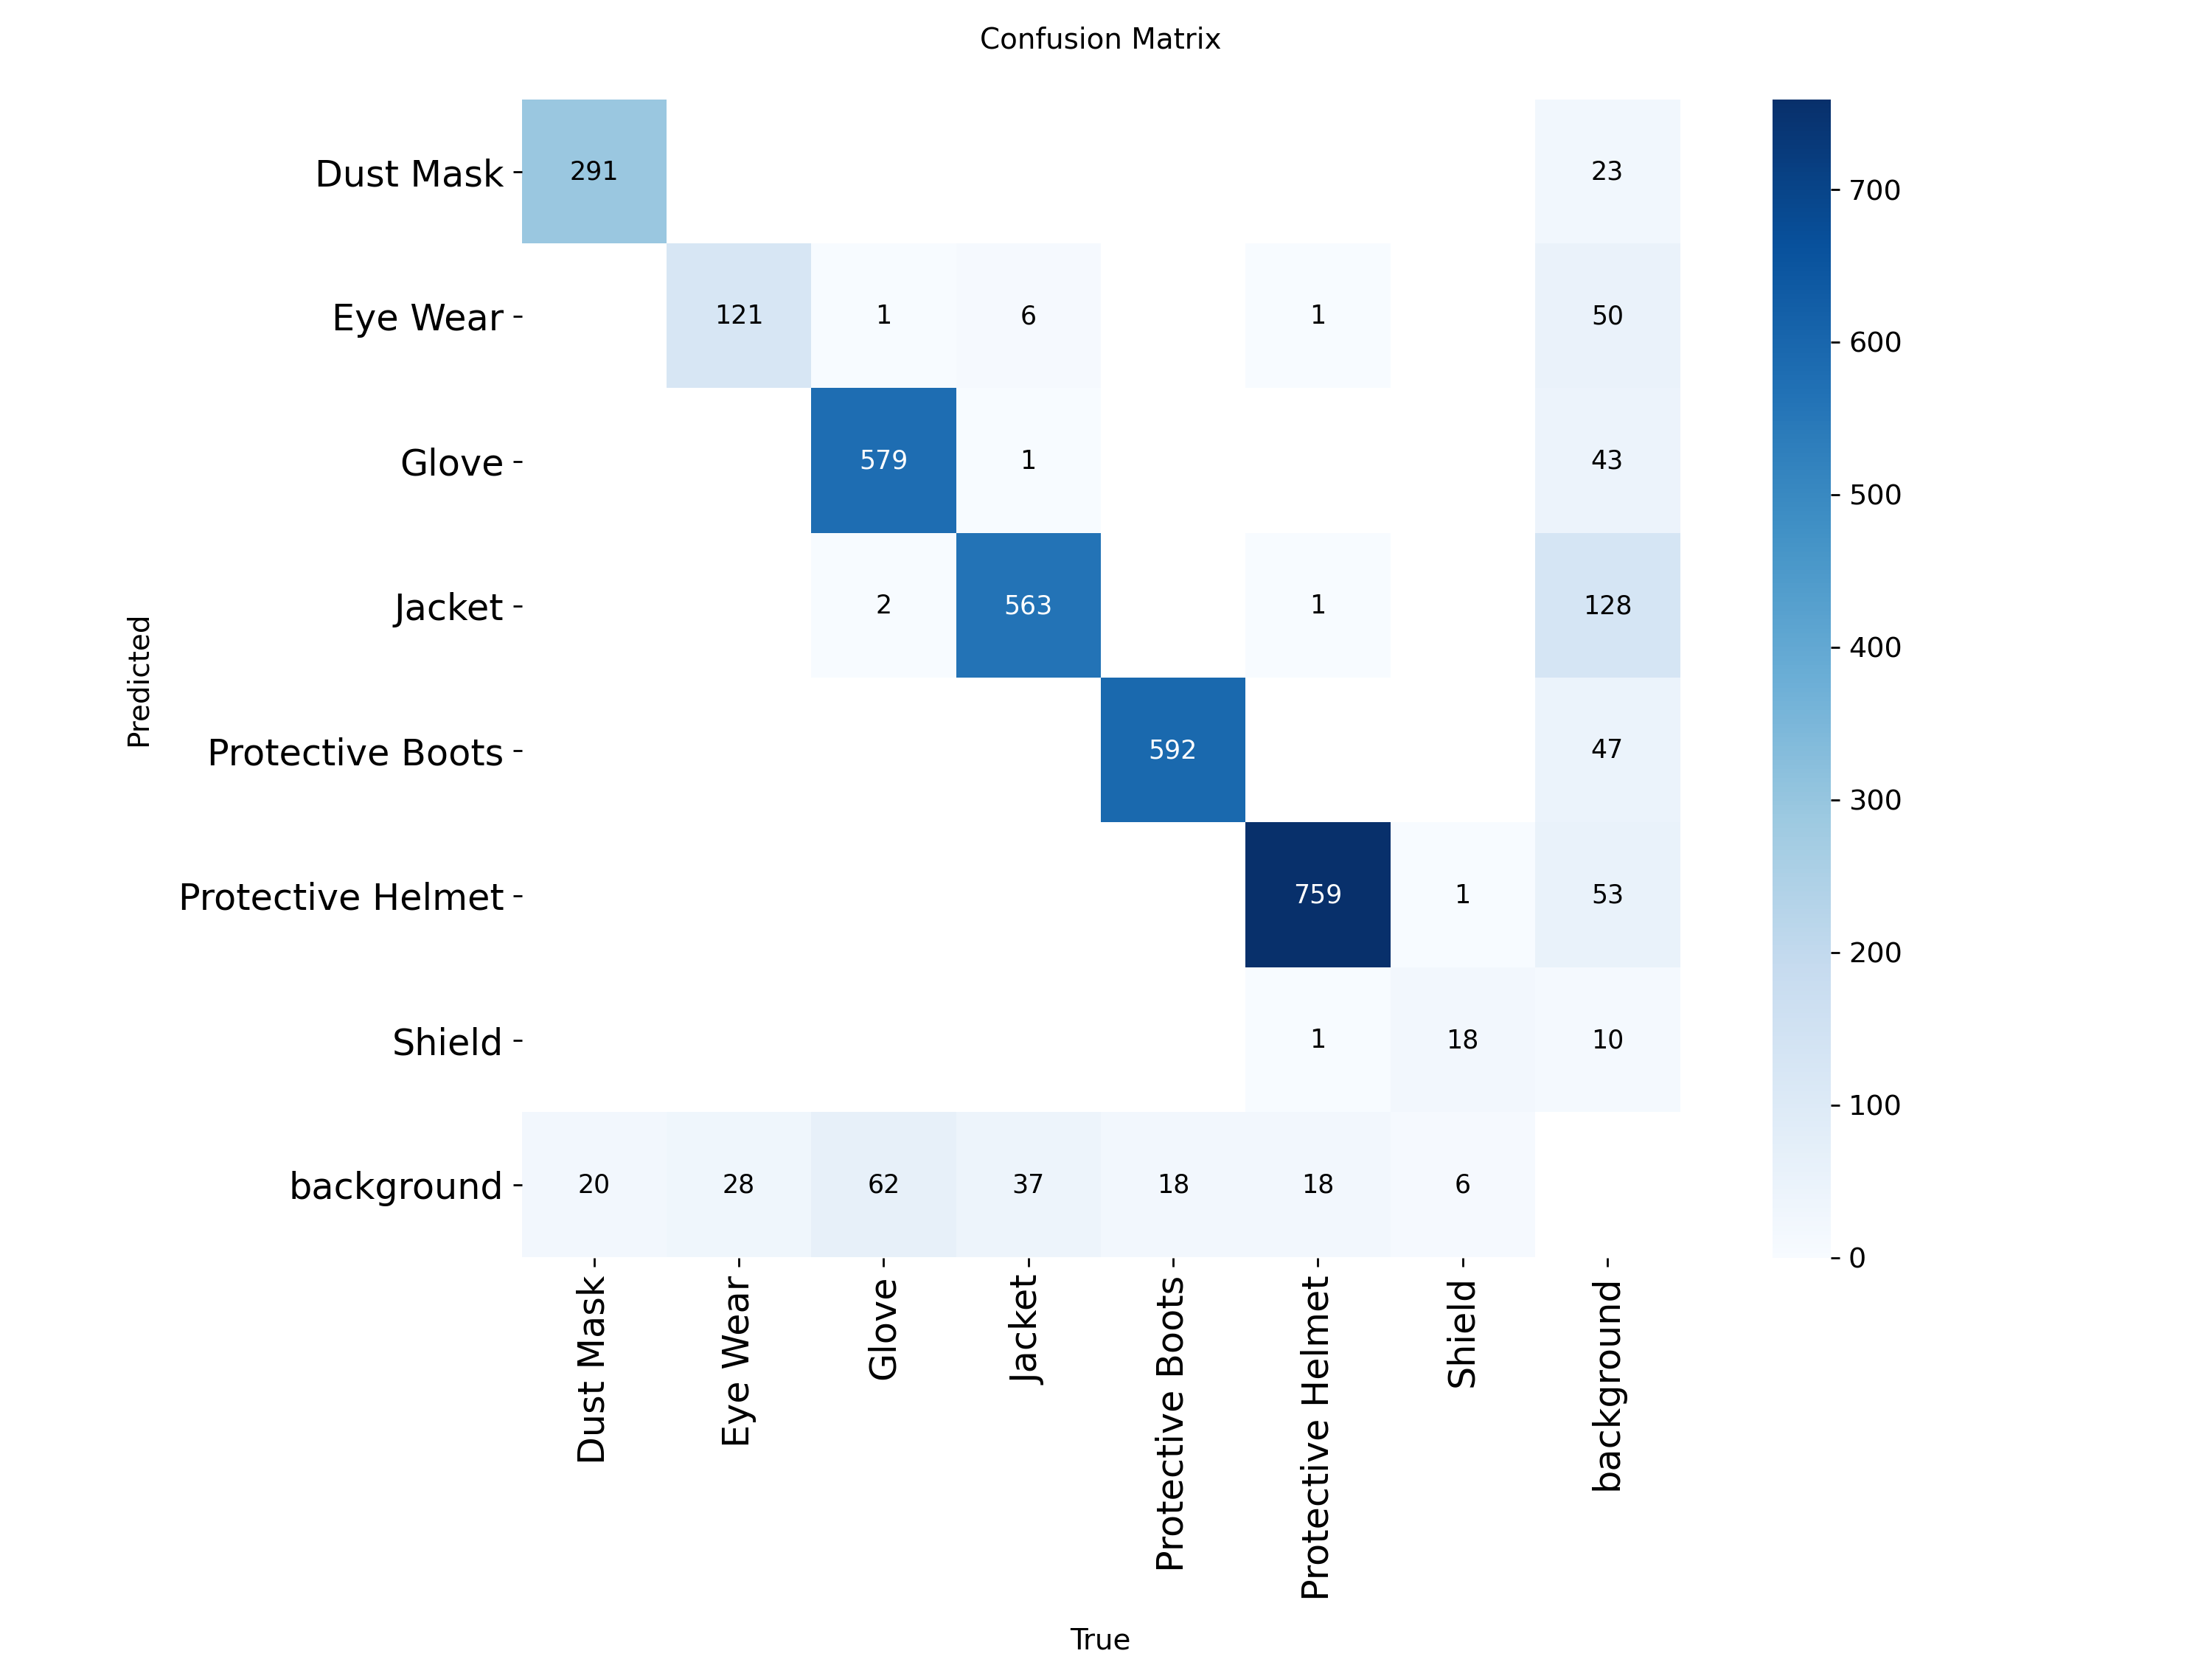

In [14]:
Image("/content/drive/MyDrive/yolo_tutorial/runs/detect/train/confusion_matrix.png", width=600)

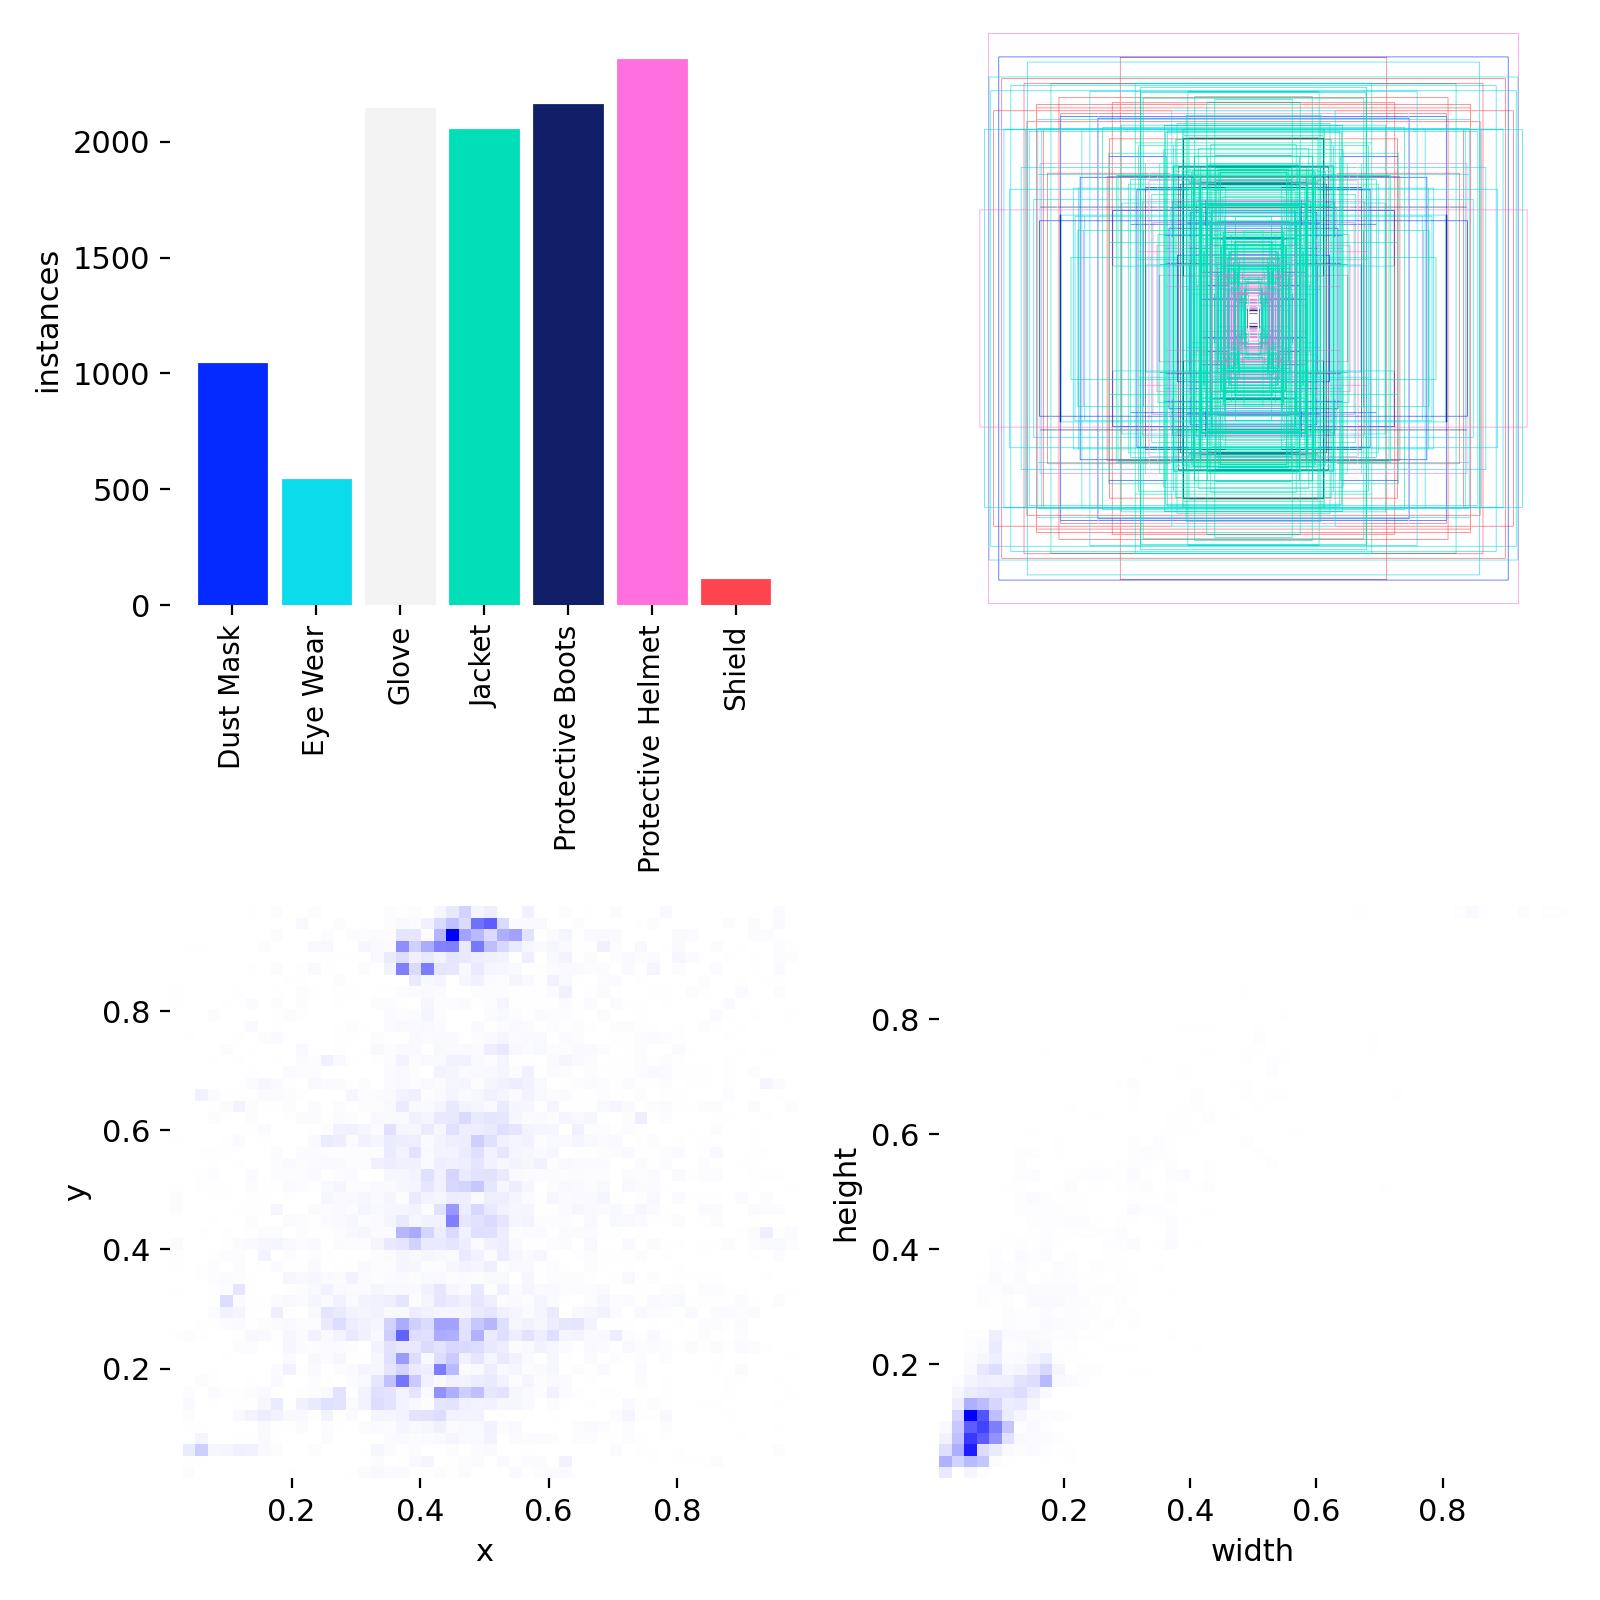

In [15]:
Image("/content/drive/MyDrive/yolo_tutorial/runs/detect/train/labels.jpg", width=600)

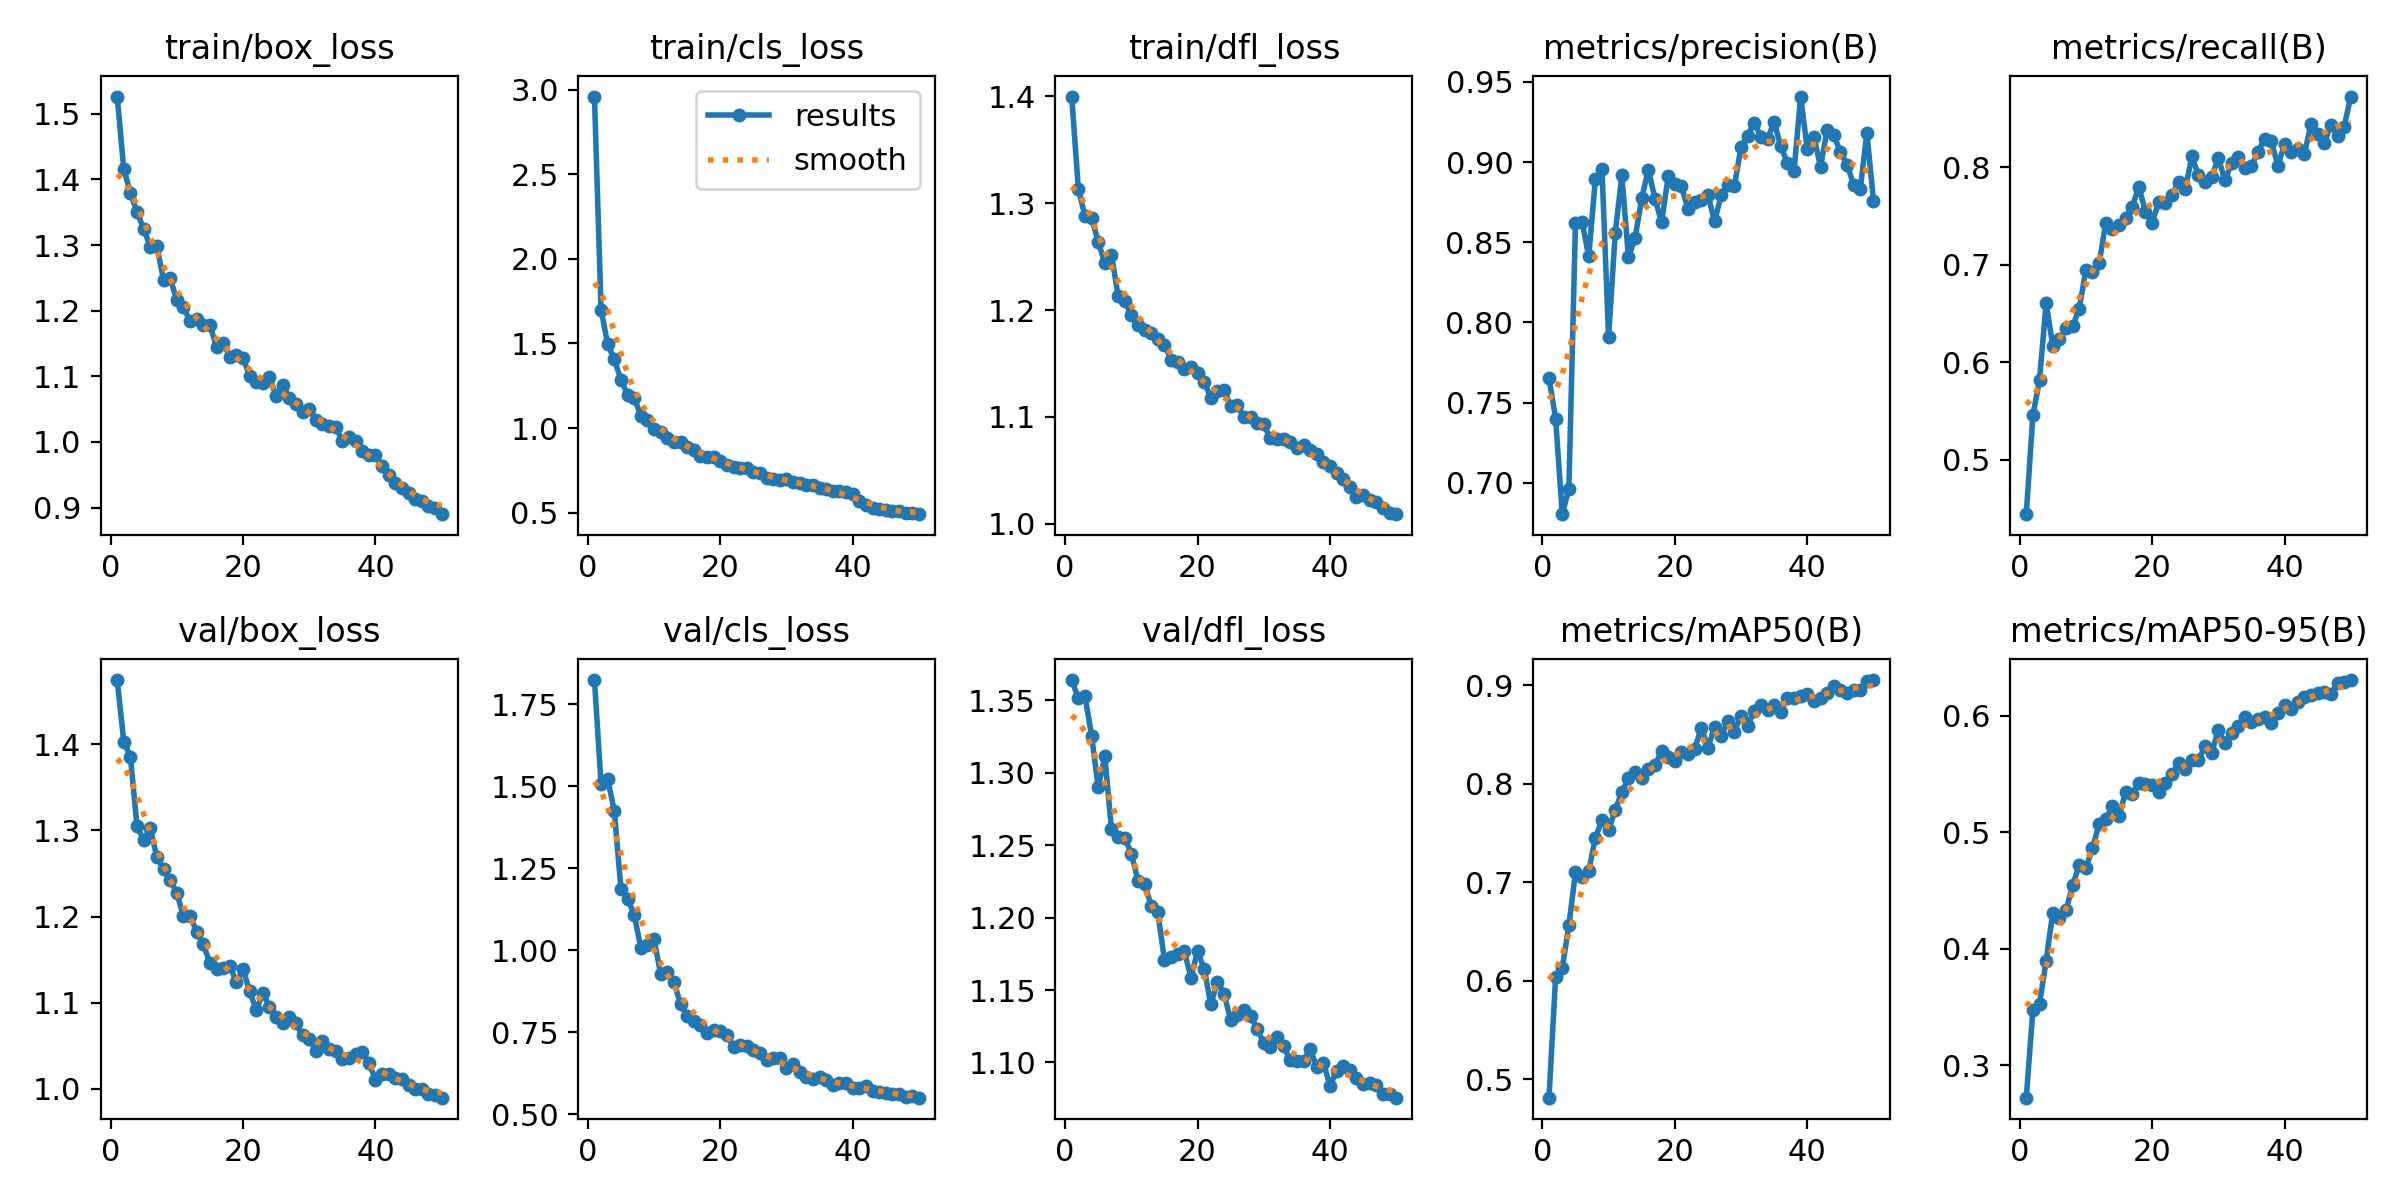

In [16]:
Image("/content/drive/MyDrive/yolo_tutorial/runs/detect/train/results.png", width=600)

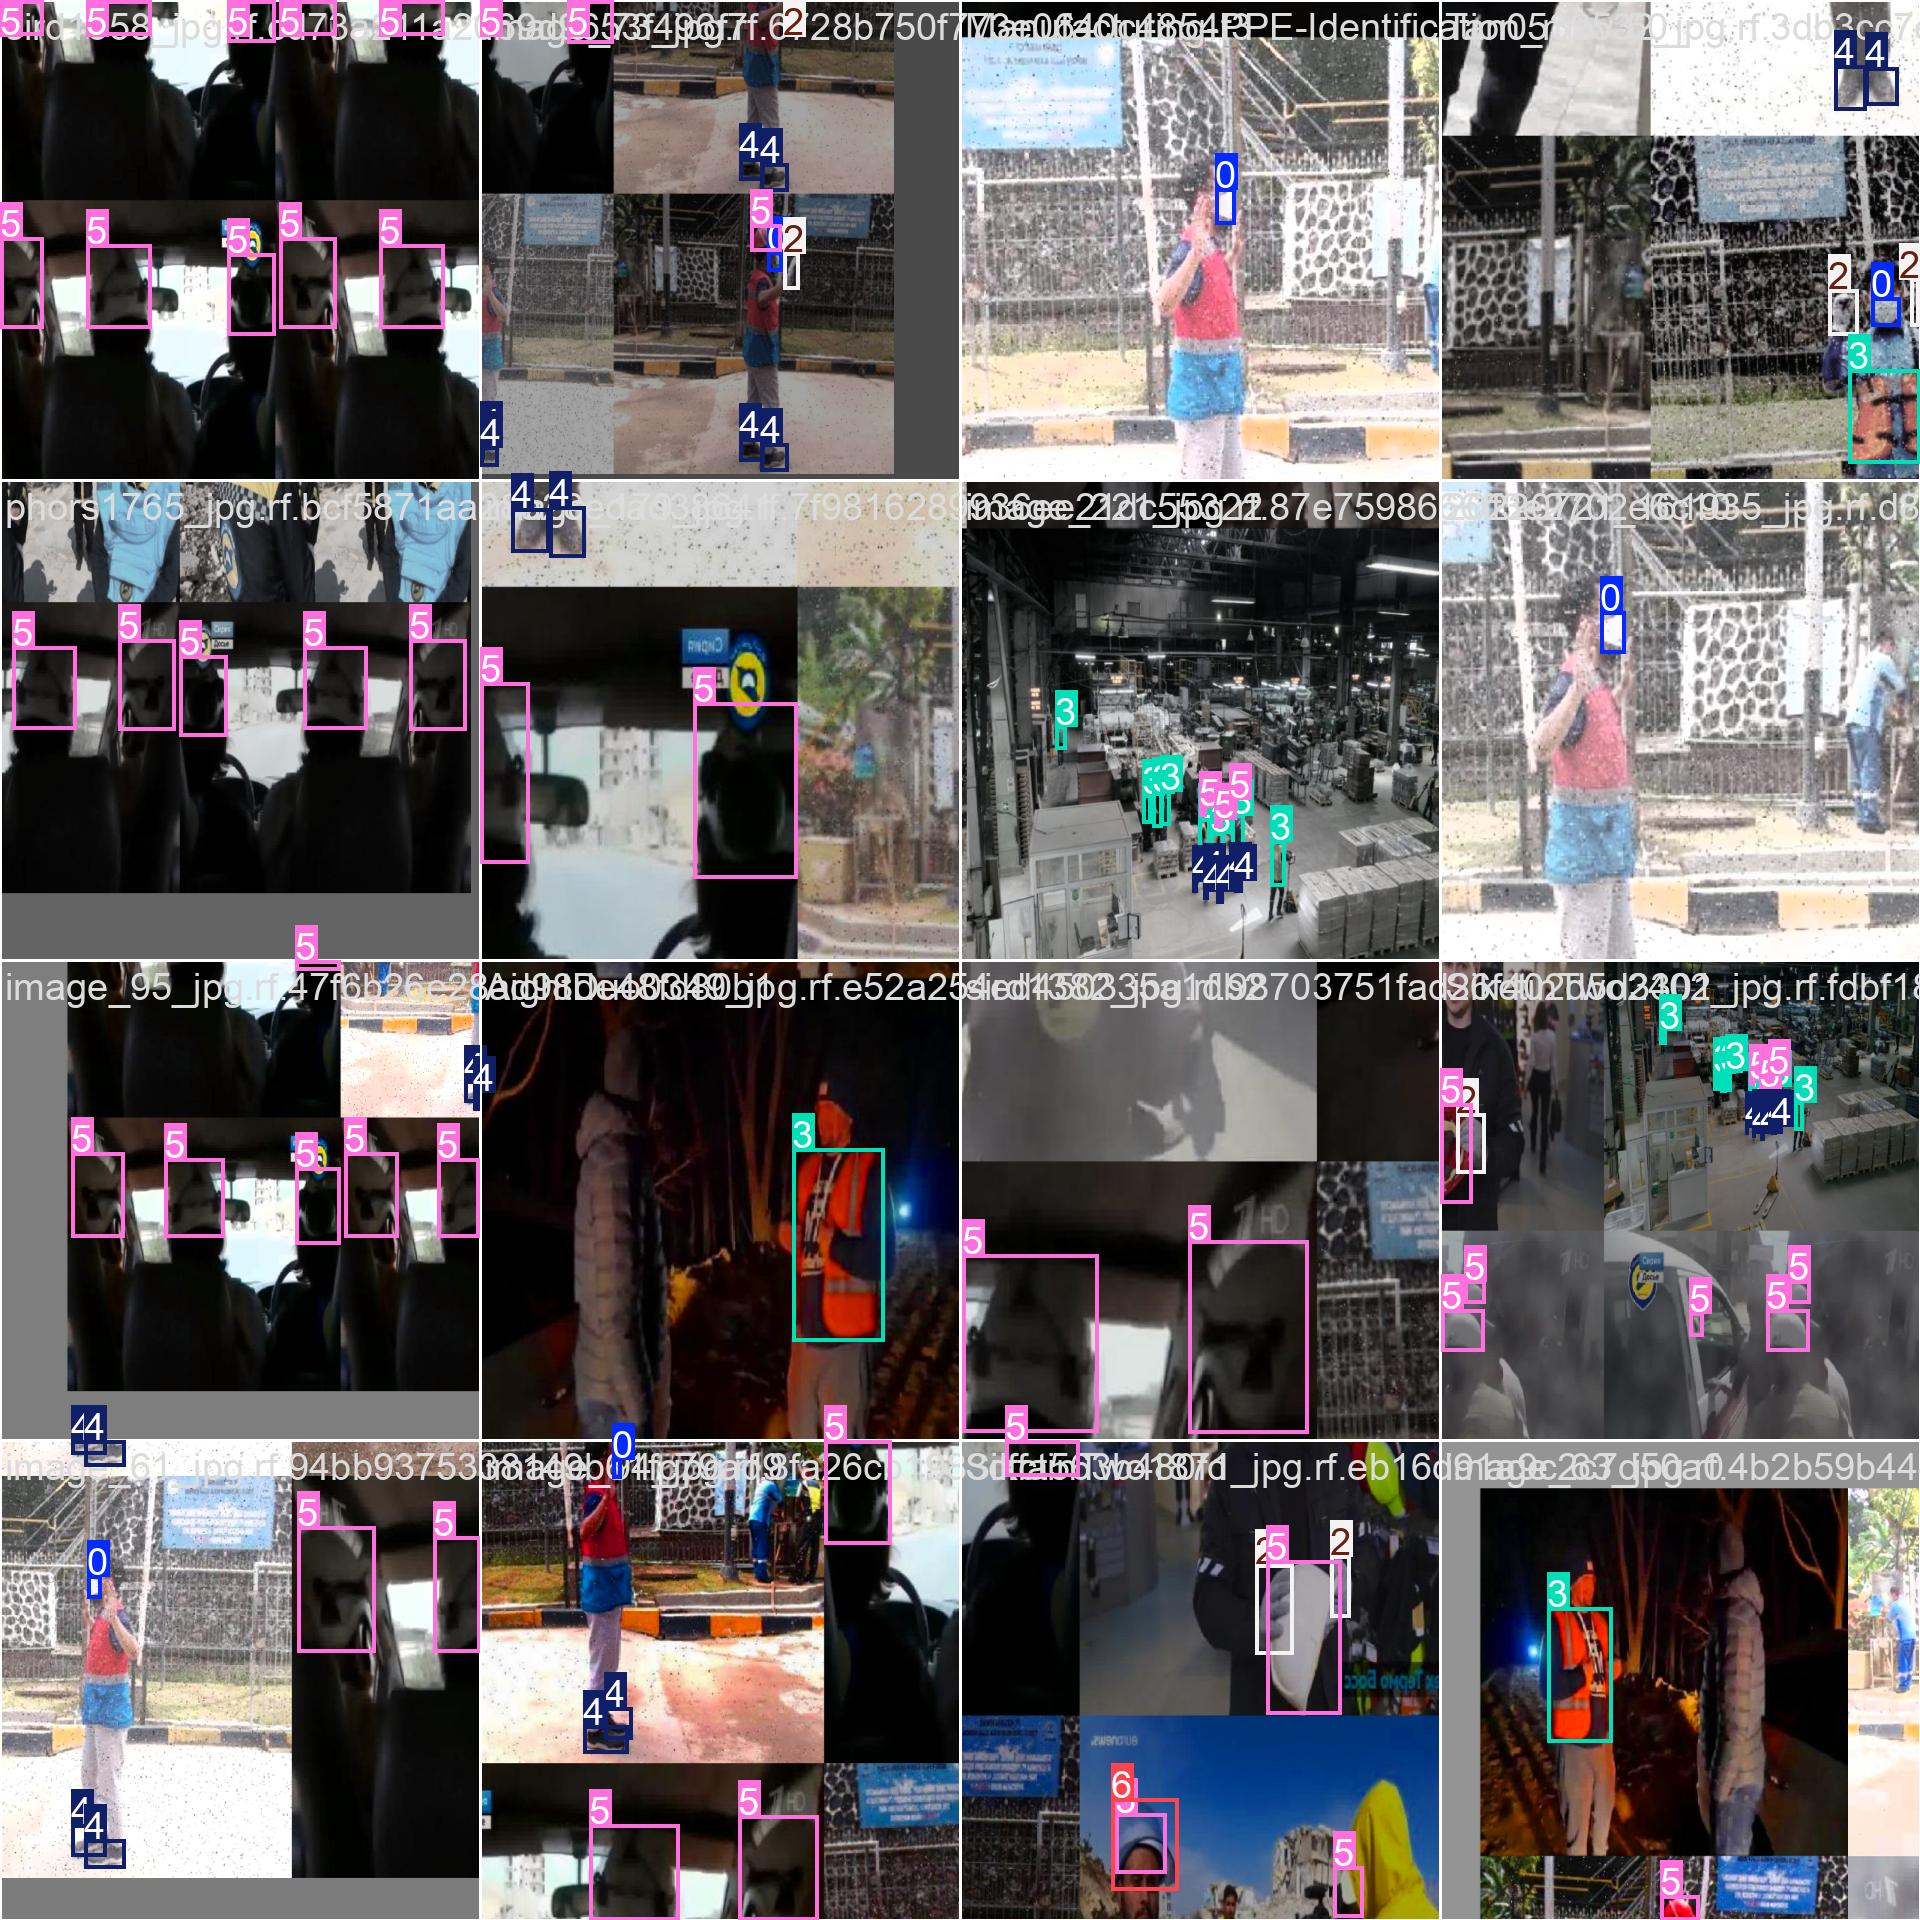

In [17]:
Image("/content/drive/MyDrive/yolo_tutorial/runs/detect/train/train_batch0.jpg", width=600)

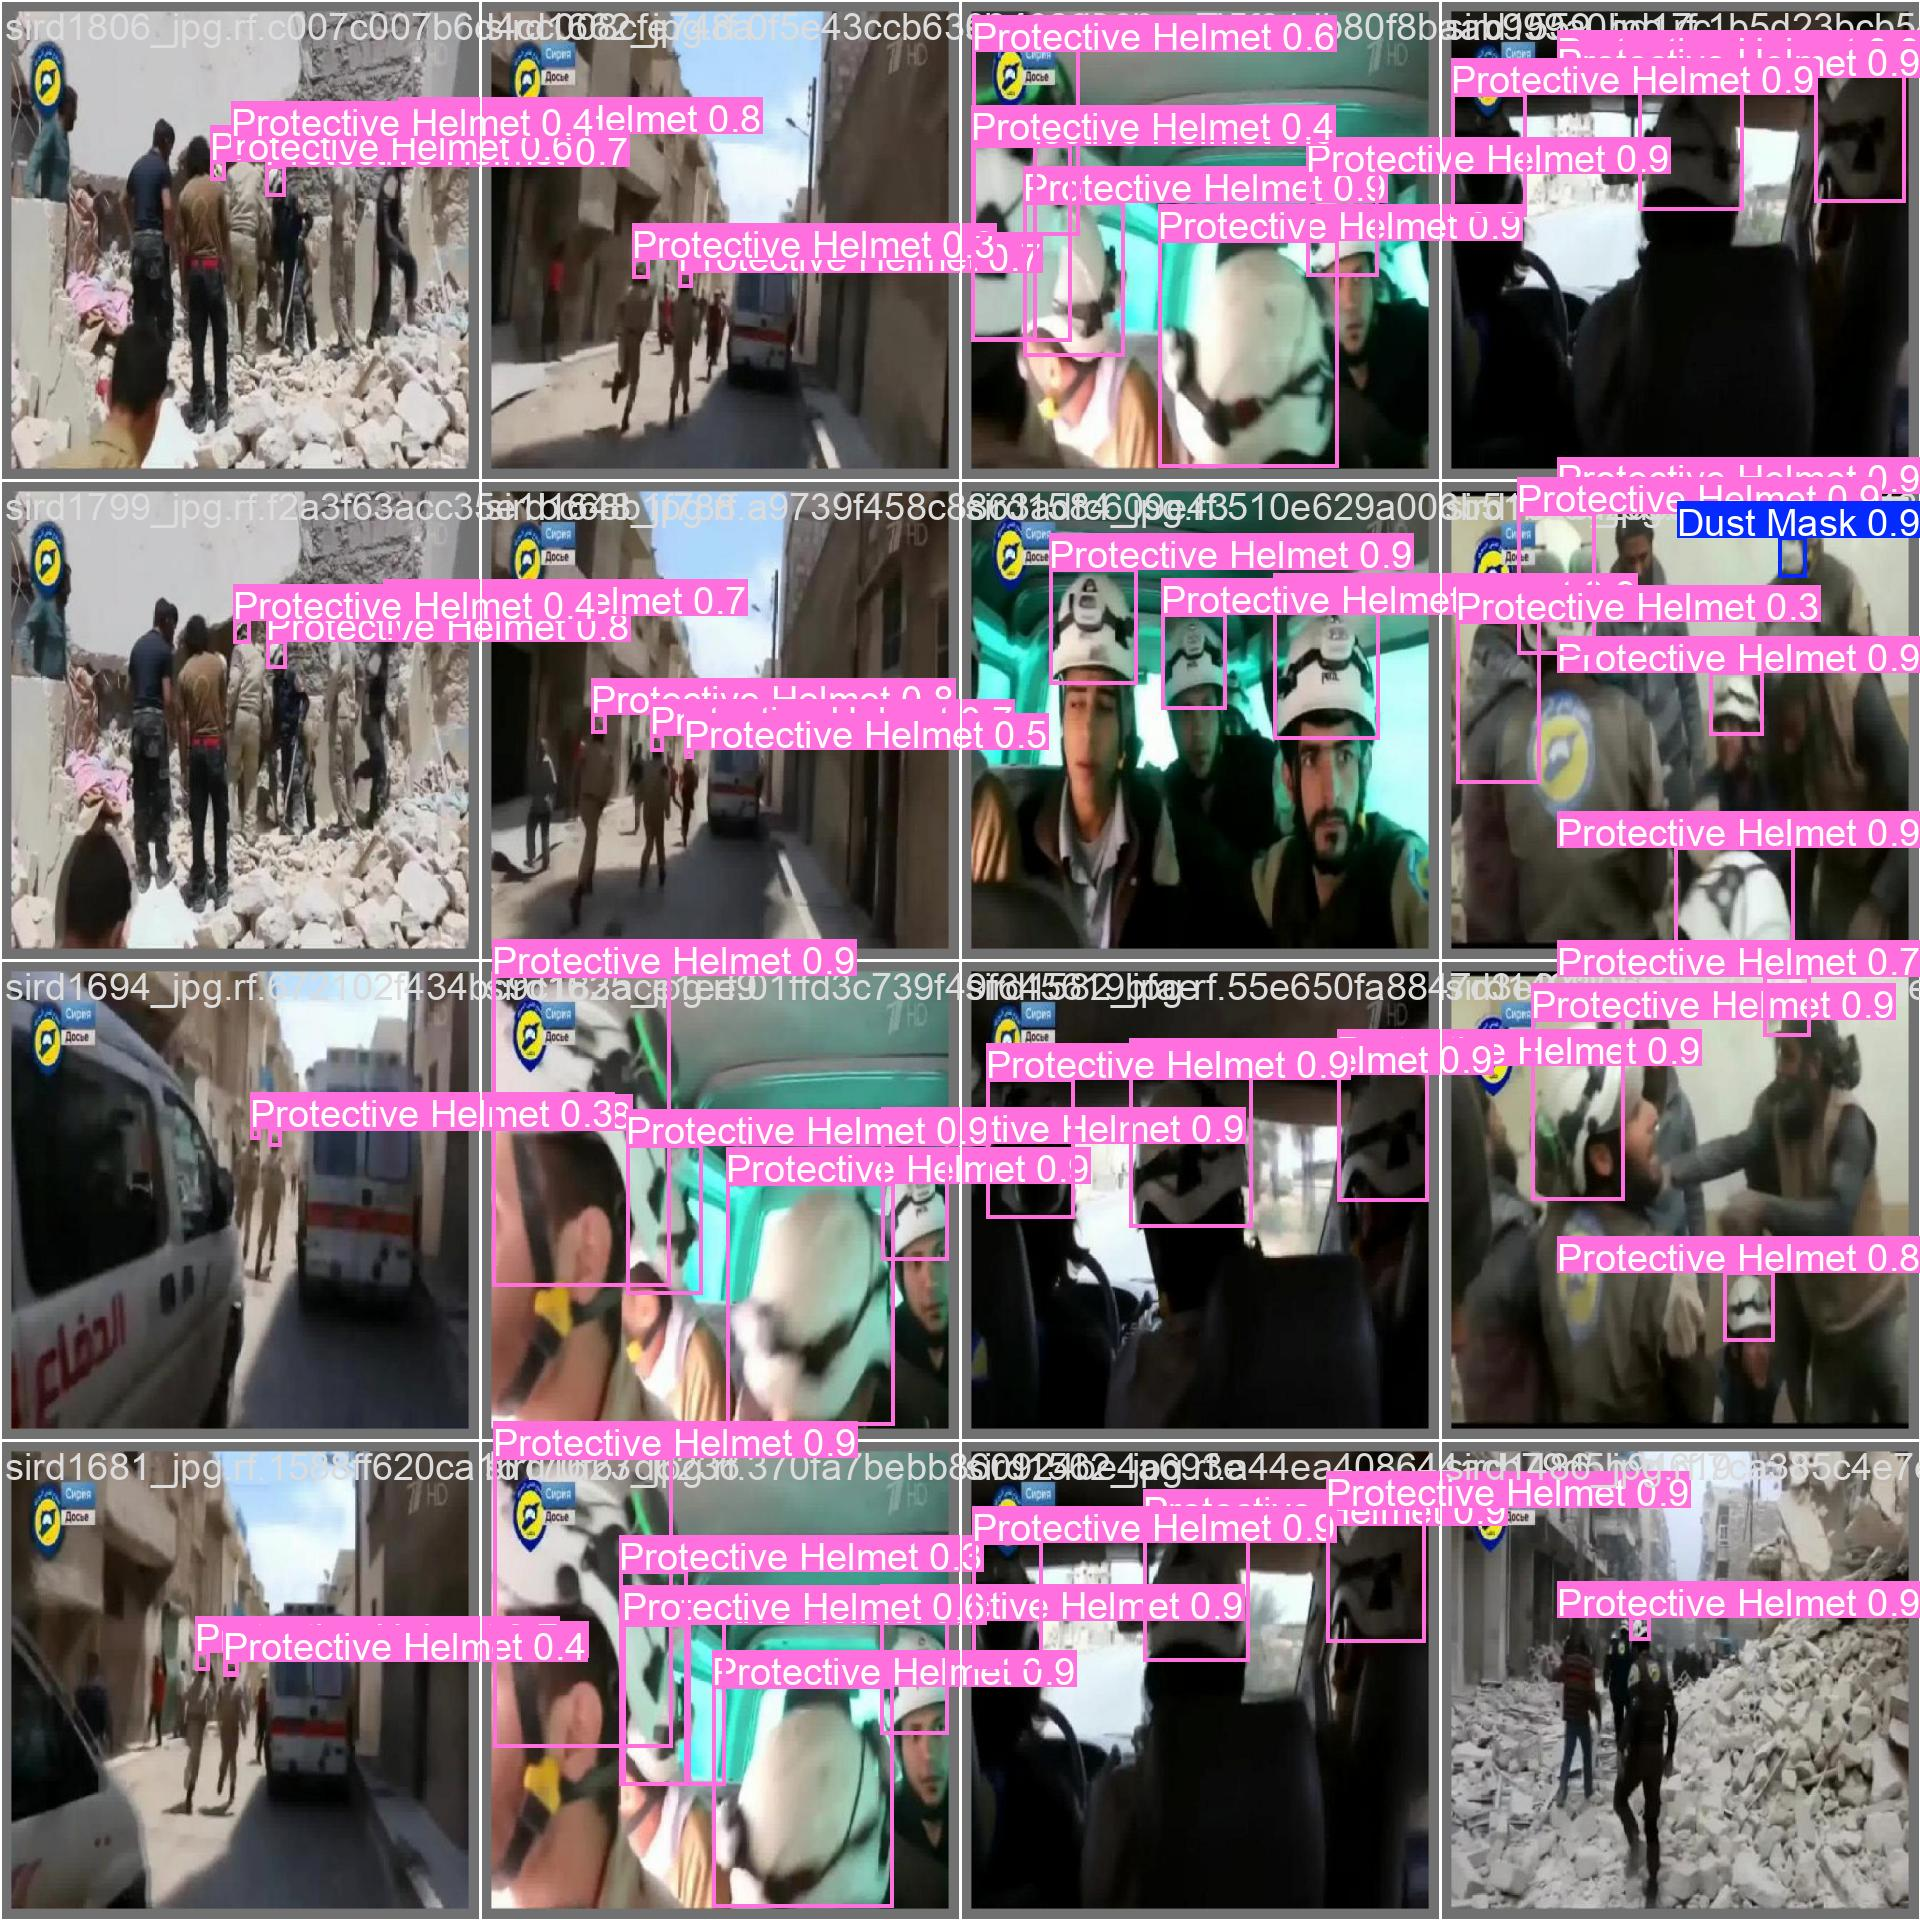

In [18]:
Image("/content/drive/MyDrive/yolo_tutorial/runs/detect/train/val_batch0_pred.jpg", width=600)

In [21]:
model = YOLO("/content/drive/MyDrive/yolo_tutorial/runs/detect/train/weights/best.pt")
model.val(data="/content/drive/MyDrive/PPE_Detection-1/data.yaml")

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 27.0±18.0 MB/s, size: 63.8 KB)


val: Scanning /content/drive/MyDrive/PPE_Detection-1/valid/labels.cache... 649 images, 0 backgrounds, 0 corrupt: 100%|██████████| 649/649 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 41/41 [00:10<00:00,  3.73it/s]


                   all        649       3126      0.876      0.872      0.906       0.63
             Dust Mask        301        311      0.934       0.92      0.948      0.664
              Eye Wear        148        149      0.727      0.785      0.802      0.448
                 Glove        354        644      0.954      0.893      0.939      0.669
                Jacket        364        607      0.852      0.899      0.934      0.717
      Protective Boots        299        610      0.948      0.959      0.983      0.692
     Protective Helmet        413        780      0.945      0.964      0.985      0.755
                Shield         25         25      0.774      0.684      0.748      0.467
Speed: 0.5ms preprocess, 4.6ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_tutorial/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a62e4944090>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [22]:
model.predict(source="/content/drive/MyDrive/PPE_Detection-1/test/images", conf=0.25, save=True)


image 1/325 /content/drive/MyDrive/PPE_Detection-1/test/images/000446_jpg.rf.5ea7ca6bde68eb546e8c3dcd1c0fd6d5.jpg: 640x640 3 Gloves, 3 Protective Helmets, 9.5ms
image 2/325 /content/drive/MyDrive/PPE_Detection-1/test/images/20220721_161946_jpg.rf.4ff1543edb0405f57fb590d5dcb284b6.jpg: 640x640 1 Dust Mask, 9.1ms
image 3/325 /content/drive/MyDrive/PPE_Detection-1/test/images/20220721_162015_jpg.rf.ee54ba7d79baa065a7cfc4666f0fd024.jpg: 640x640 2 Dust Masks, 1 Glove, 9.0ms
image 4/325 /content/drive/MyDrive/PPE_Detection-1/test/images/20220721_162036_jpg.rf.9d32aa23505a54eff5555d9b667bb597.jpg: 640x640 1 Dust Mask, 24.8ms
image 5/325 /content/drive/MyDrive/PPE_Detection-1/test/images/20220721_162308_jpg.rf.2f8d1ad4716998b9fc123d94dce4d8b0.jpg: 640x640 1 Dust Mask, 2 Eye Wears, 10.6ms
image 6/325 /content/drive/MyDrive/PPE_Detection-1/test/images/20220721_162435_jpg.rf.f36f898409158c65a23c0604535ff366.jpg: 640x640 1 Eye Wear, 1 Protective Helmet, 16.5ms
image 7/325 /content/drive/MyDrive/PP

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Dust Mask', 1: 'Eye Wear', 2: 'Glove', 3: 'Jacket', 4: 'Protective Boots', 5: 'Protective Helmet', 6: 'Shield'}
 obb: None
 orig_img: array([[[235, 214, 192],
         [238, 217, 195],
         [243, 222, 201],
         ...,
         [219, 216, 195],
         [216, 209, 189],
         [211, 205, 182]],
 
        [[235, 214, 192],
         [239, 218, 196],
         [244, 223, 202],
         ...,
         [213, 209, 190],
         [217, 212, 191],
         [220, 214, 191]],
 
        [[236, 215, 194],
         [240, 219, 198],
         [245, 224, 203],
         ...,
         [204, 200, 181],
         [217, 212, 191],
         [228, 223, 202]],
 
        ...,
 
        [[ 26,  21,  22],
         [ 23,  21,  21],
         [ 16,  18,  18],
         ...,
         [137, 167, 184],
         [134, 166, 185],
         [132, 164, 183]],
 
       

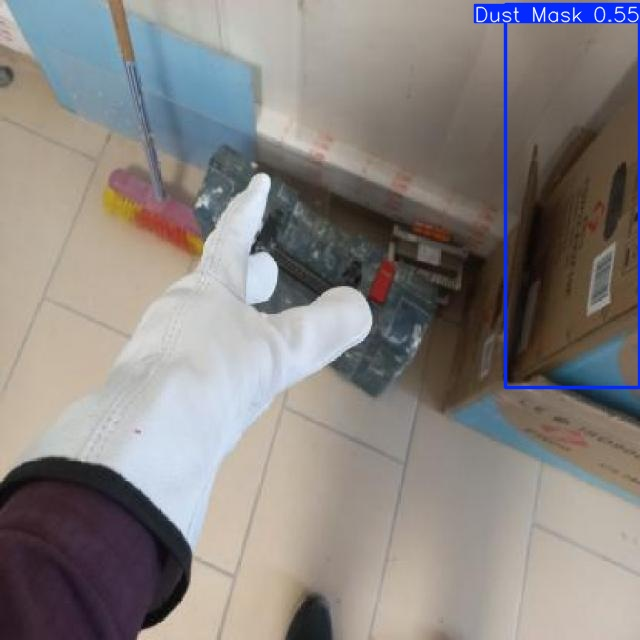

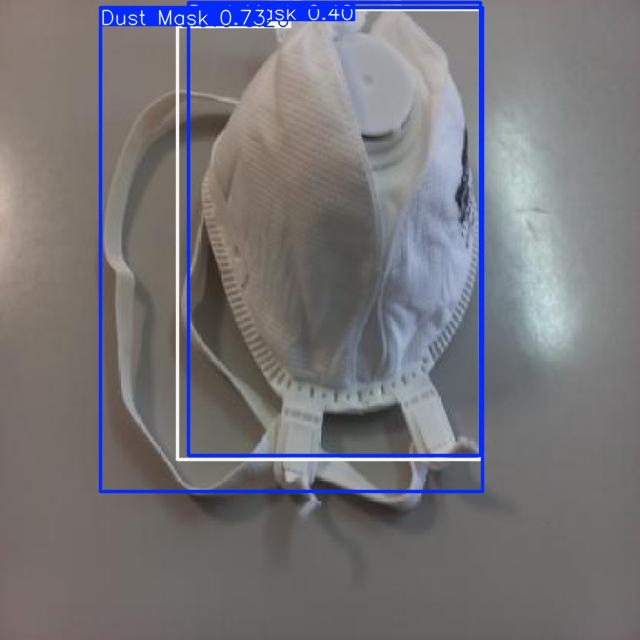

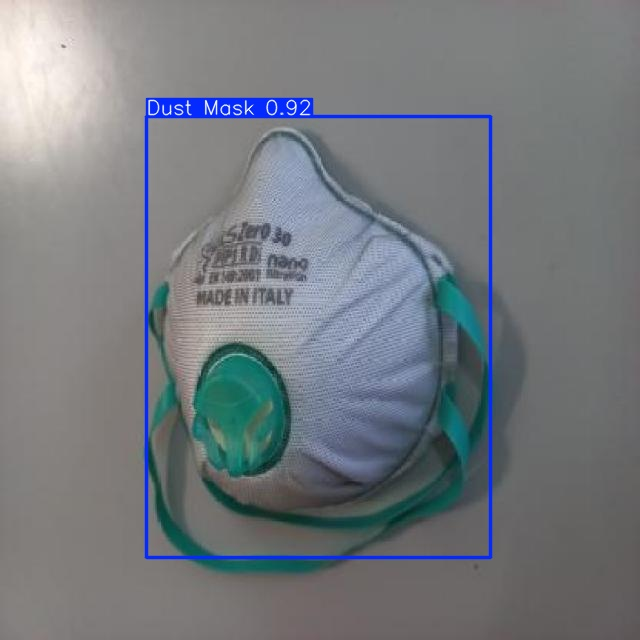

In [24]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/drive/MyDrive/yolo_tutorial/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [25]:
!gdown "https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t
To: /content/PPE_Part2.mp4
100% 11.1M/11.1M [00:00<00:00, 79.2MB/s]


In [26]:
model.predict(source="/content/PPE_Part2.mp4", conf=0.25, save=True)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/267) /content/PPE_Part2.mp4: 384x640 (no detections), 53.2ms
video 1/1 (frame 2/267) /content/PPE_Part2.mp4: 384x640 (no detections), 9.4ms
video 1/1 (frame 3/267) /content/PPE_Part2.mp4: 384x640 (no detections), 11.7ms
video 1/1 (frame 4/267) /content/PPE_Part2.mp4: 384x640 (no detections), 10.5ms
video 1/1 (frame 5/267) /content/PPE_Part2.mp4: 384x640 (no detections), 12.9ms
video 1/1 (frame 6/267) /content/PPE_Part2.mp4: 384x640 (

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Dust Mask', 1: 'Eye Wear', 2: 'Glove', 3: 'Jacket', 4: 'Protective Boots', 5: 'Protective Helmet', 6: 'Shield'}
 obb: None
 orig_img: array([[[ 12,  12,  10],
         [ 12,  12,  10],
         [ 12,  12,  10],
         ...,
         [ 12,  15,   5],
         [ 12,  15,   5],
         [ 12,  15,   5]],
 
        [[ 11,  11,   9],
         [ 11,  11,   9],
         [ 11,  11,   9],
         ...,
         [ 12,  15,   5],
         [ 12,  15,   5],
         [ 12,  15,   5]],
 
        [[  8,   8,   6],
         [  8,   8,   6],
         [  8,   8,   6],
         ...,
         [ 12,  15,   5],
         [ 12,  15,   5],
         [ 12,  15,   5]],
 
        ...,
 
        [[ 43,  61,  63],
         [ 62,  80,  82],
         [ 71,  94, 100],
         ...,
         [137, 143, 147],
         [137, 143, 147],
         [137, 143, 147]],
 
       

Save the model


In [27]:
model.save('/content/drive/MyDrive/yolo_models/Yolo_cust_data.pt')